# Linear Model Example

#### Video

https://www.youtube.com/watch?v=YgaBv6CXfvo&list=PLL0SWcFqypCl4lrzk1dMWwTUrzQZFt7y0&index=16 (Linear vs Nonlinear models)

Google Colab link: https://drive.google.com/file/d/1xXrDpSHDg0BKVXCCgG0p8QoH6jX0NTaA/view?usp=sharing

### Libraries Needed
- pandas
- sklearn
- CBFV
- matplotlib
- time
- collections

In [1]:
from pandas import read_csv
from sklearn.linear_model import Ridge, Lasso
from CBFV import composition
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import pandas as pd
from time import time
from collections import OrderedDict
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

C:\Users\taylo\AppData\Local\Temp\ipykernel_23456\3682656856.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  from pandas import read_csv


## Preparing the Data

After loading the dataset into a dataframe and extracting the wanted columns, the data is turned into a composition based feature vector using the CBFV library. The standardization and normalization of the data makes sure that all the data is on the same scale (if you have a column with very small numbers and a column with a larger magnitude it can make a model perform worse). 

In [2]:
# Load the dataset and name it for use with CBFV
df_train = read_csv('cp_train.csv')
df_val = read_csv('cp_val.csv')
df_test = read_csv('cp_test.csv')

# Split the dataset into testing, training, and validation sets
rename_dict = {'Cp': 'target'}
df_train = df_train.rename(columns=rename_dict) # Dataset to train the model on
df_val = df_val.rename(columns=rename_dict) # Dataset to test the model against in order to tune it 
df_test = df_test.rename(columns=rename_dict) # Dataset to test the model against as the last step

# Create the CBFV from your loaded dataset
X_train, y_train, formulae, skipped = composition.generate_features(df_train, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val, y_val, formulae, skipped = composition.generate_features(df_val, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test, y_test, formulae, skipped = composition.generate_features(df_test, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

# Scale and normalize the data AFTER transforming it into a CBFV 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train = normalize(X_train_scaled)
X_val = normalize(X_val_scaled)
X_test = normalize(X_test_scaled)

Processing Input Data: 100%|██████████| 3214/3214 [00:00<00:00, 15000.74it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 3214/3214 [00:00<00:00, 11549.59it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 980/980 [00:00<00:00, 22362.81it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 980/980 [00:00<00:00, 9245.62it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 370/370 [00:00<00:00, 23544.20it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 370/370 [00:00<00:00, 14101.70it/s]


	Creating Pandas Objects...


## Ridge

The first model we will look at is a Ridge Regression model. Ridge models are good for datasets where there might be correlated features. In this instance we will use it to find out what features may be of any significance in predicting the target value. 

c:\Users\taylo\miniconda3\envs\MatInformatics2\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R^2 on val set is 0.83
MAE on val set is 19.01
RMSE on val set is 32.65


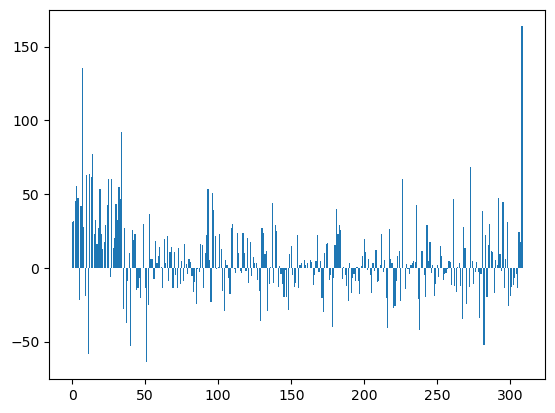

In [3]:
# Define model with no hyperparameter tuning for now
model = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, random_state=None, solver='auto', tol=0.001)

# Train the Ridge regression model on the training dataset
model.fit(X_train, y_train)

# Use the trained model to make predictions on the validation dataset
y_pred = model.predict(X_val)

# Evaluate and collect performance metrics for the model
r2 = r2_score(y_val, y_pred)  # Coefficient of determination (R^2)
mae = mean_absolute_error(y_val, y_pred)  # Mean Absolute Error (MAE)
rmse_val = mean_squared_error(y_val, y_pred)  # Root Mean Squared Error (RMSE)

# Print the performance metrics
print(f'R^2 on val set is {r2:.2f}')
print(f'MAE on val set is {mae:.2f}')
print(f'RMSE on val set is {rmse_val:.2f}')

# Calculate and report feature importance
importance = model.coef_

# Visualize the feature importance using a bar plot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Lasso

Lasso Regression models are very similar to Ridge Regression models in that they are good for dealing with datasets where the features may have correlatino to the target value. 

c:\Users\taylo\miniconda3\envs\MatInformatics2\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R^2 on val set is 0.62
MAE on val set is 31.00
RMSE on val set is 49.54


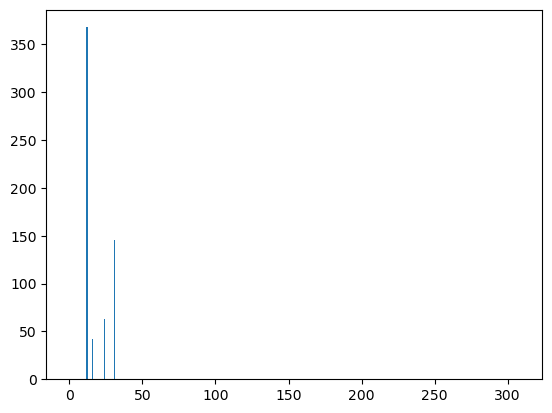

In [4]:
# Define a Lasso regression model with no hyperparameter tuning
model = Lasso(alpha=1.0)

# Train the Lasso regression model on the training dataset
model.fit(X_train, y_train)

# Use the trained model to make predictions on the validation dataset
y_pred = model.predict(X_val)

# Evaluate and collect performance metrics for the model
r2 = r2_score(y_val, y_pred)  # Coefficient of determination (R^2)
mae = mean_absolute_error(y_val, y_pred)  # Mean Absolute Error (MAE)
rmse_val = mean_squared_error(y_val, y_pred)  # Root Mean Squared Error (RMSE)

# Print the performance metrics
print(f'R^2 on val set is {r2:.2f}')
print(f'MAE on val set is {mae:.2f}')
print(f'RMSE on val set is {rmse_val:.2f}')

# Calculate and report feature importance (coefficients) from the trained model
importance = model.coef_

# Visualize the feature importance using a bar plot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
